In [1]:
#.libPaths(c("/home/data/refdir/Rlib","/home/data/t060324/R/x86_64-pc-linux-gnu-library/4.1"))
library(limma)
library(Seurat)
setwd('/home/data/t060324/jobs/aimin/')

The legacy packages maptools, rgdal, and rgeos, underpinning this package
will retire shortly. Please refer to R-spatial evolution reports on
https://r-spatial.org/r/2023/05/15/evolution4.html for details.
This package is now running under evolution status 0 

Attaching SeuratObject



In [22]:
geneID.table <- read.table('./data/GSE154600_RAW/T59/genes.tsv')
head(geneID.table)

,V1,V2,V3,V4
,<chr>,<chr>,<chr>,<chr>
1,ENSG00000243485,MIR1302-2HG,Gene,Expression
2,ENSG00000237613,FAM138A,Gene,Expression
3,ENSG00000186092,OR4F5,Gene,Expression
4,ENSG00000238009,AL627309.1,Gene,Expression
5,ENSG00000239945,AL627309.3,Gene,Expression
6,ENSG00000239906,AL627309.2,Gene,Expression


## 1. ROS-related gene identification and pathway enrichment analysis

In [14]:
TCGA_OV_TPM_log <- readRDS(file = './data/bulk/TCGA_OV_TPM_log2.RDS')

In [3]:
load(file = "./output/MEGENA/summary.TCGA_MEGENA.output.RData")
all_signiff_modules_fisher <- readRDS(file = './output/MEGENA/all_signiff_modules_fisher.RDS')

In [4]:
modules_list <- summary.TCGA_MEGENA.output$modules[all_signiff_modules_fisher]

In [8]:
library(GSVA)

In [9]:
modules_score <- gsva(expr = TCGA_OV_TPM_log,gset.idx.list = modules_list,method='gsva',kcdf="Gaussian")

Warning message in .filterFeatures(expr, method):
“556 genes with constant expression values throuhgout the samples.”
Warning message in .filterFeatures(expr, method):
“Since argument method!="ssgsea", genes with constant expression values are discarded.”
Warning message in .gsva(expr, mapped.gset.idx.list, method, kcdf, rnaseq, abs.ranking, :
“Some gene sets have size one. Consider setting 'min.sz > 1'.”


Estimating GSVA scores for 27 gene sets.
Estimating ECDFs with Gaussian kernels
  |======================================================================| 100%



In [10]:
modules_list$c1_53

[1] "EGR1"         "FOS"          "HBA1"         "DUSP1"        "FOSB"        
 [6] "NR4A1"        "HBA2"         "EGR3"         "EGR2"         "IER2"        
[11] "MIR23A"       "ATF3"         "JUN"          "KLF6"         "SOCS3"       
[16] "CSRNP1"       "GADD45B"      "HBEGF"        "IL6"          "BTG2"        
[21] "KLF4"         "DUSP5"        "JUNB"         "DUSP2"        "NR4A3"       
[26] "FOSL1"        "ARC"          "LOC102724428" "RASD1"        "NR4A1AS"     
[31] "PER1"         "IER3"         "MIR4530"      "BBC3"         "HBB"         
[36] "ZFP36"        "MIR27A"       "PPP1R15A"     "RHOB"         "SGK1"        
[41] "RN7SL265P"    "TSC22D3"      "TCIM"

In [11]:
moduleCor2Gene <- cor(t(modules_score),t(TCGA_OV_TPM_log))

Warning message in cor(t(modules_score), t(TCGA_OV_TPM_log)):
“the standard deviation is zero”


In [12]:
tail(moduleCor2Gene)

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A3GALT2,A4GALT,⋯,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1
c1_123,0.08234948,0.16219527,-0.115172335,0.24950319,-0.25297286,-0.08739713,-0.05435530,-0.08873991,-0.15478751,0.198235266,⋯,-0.13791957,-0.11112740,-0.06563321,-0.08506253,-0.100863752,-0.18695511,-0.07013272,-0.11810696,0.23064275,-0.074078683
c1_364,-0.10561700,-0.04384011,-0.135705756,0.07039706,-0.31766921,-0.12656481,-0.14963955,-0.07951726,-0.15731781,0.006008773,⋯,-0.22250537,-0.32087488,-0.19649256,-0.07510545,-0.139590612,-0.25706669,-0.28513141,-0.19829053,0.11278547,-0.245012875
c1_574,0.13895755,0.19705614,-0.096286497,0.29874626,-0.19541712,-0.06779040,-0.08135391,-0.05509654,-0.12325770,0.209707499,⋯,-0.03874735,-0.05562011,-0.01194708,-0.01473591,-0.004523141,-0.06438854,-0.04246882,-0.05429343,0.32079585,0.057219051
c1_578,0.14812863,0.24339329,-0.084894215,0.29939680,-0.06342796,-0.01915601,-0.06116361,-0.08818932,-0.07287809,0.235557200,⋯,-0.01013229,-0.01861294,-0.08461182,0.04921369,0.026030415,-0.01054163,-0.02792844,0.01168737,0.26279404,0.120120985
c1_581,0.11234886,0.19561959,-0.120609848,0.29619058,-0.23584452,-0.05560298,-0.07128267,-0.09211441,-0.14220432,0.213722322,⋯,-0.11434580,-0.10635729,-0.10197280,-0.06629646,-0.088414380,-0.13113817,-0.06973028,-0.07787364,0.27390277,0.002348519
c1_769,0.07335658,0.09139133,0.005980455,0.04715433,-0.11657524,0.01641023,0.02841326,-0.06033935,0.14455818,-0.083326778,⋯,0.32459982,0.59894672,0.68511201,0.17426382,0.183445596,0.15400242,0.27423378,0.24455715,-0.01659043,0.110555609


In [13]:
M53CorGene <- sort(moduleCor2Gene['c1_53',],decreasing = T)

In [13]:
saveRDS(M53CorGene,file = './output/bulk/section_5/0.geneCor2M53_bulk.RDS')

In [2]:
M53CorGene <- readRDS(file = './output/bulk/section_5/0.geneCor2M53_bulk.RDS')

In [3]:
head(M53CorGene)

DUSP1      FOSB       FOS     ZFP36     NR4A1      EGR1 
0.8411178 0.8318683 0.8113936 0.7896946 0.7561364 0.7550034

In [26]:
modules_list$c1_53

[1] "EGR1"         "FOS"          "HBA1"         "DUSP1"        "FOSB"        
 [6] "NR4A1"        "HBA2"         "EGR3"         "EGR2"         "IER2"        
[11] "MIR23A"       "ATF3"         "JUN"          "KLF6"         "SOCS3"       
[16] "CSRNP1"       "GADD45B"      "HBEGF"        "IL6"          "BTG2"        
[21] "KLF4"         "DUSP5"        "JUNB"         "DUSP2"        "NR4A3"       
[26] "FOSL1"        "ARC"          "LOC102724428" "RASD1"        "NR4A1AS"     
[31] "PER1"         "IER3"         "MIR4530"      "BBC3"         "HBB"         
[36] "ZFP36"        "MIR27A"       "PPP1R15A"     "RHOB"         "SGK1"        
[41] "RN7SL265P"    "TSC22D3"      "TCIM"

In [4]:
geneList <- M53CorGene
names(geneList) <- names(M53CorGene)

In [5]:
library(clusterProfiler)
library(org.Hs.eg.db)
library(enrichplot)
# we use ggplot2 to add x axis labels (ex: ridgeplot)
library(ggplot2)
organism = org.Hs.eg.db

gse <- gseGO(geneList=geneList, 
             ont ="BP", 
             keyType = "SYMBOL", 
             nPerm = 1000000, 
             minGSSize = 20, 
             maxGSSize = 100, 
             pvalueCutoff = 0.05, 
             verbose = TRUE, 
             OrgDb = organism)



clusterProfiler v4.6.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:limma’:

    plotMA


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, int

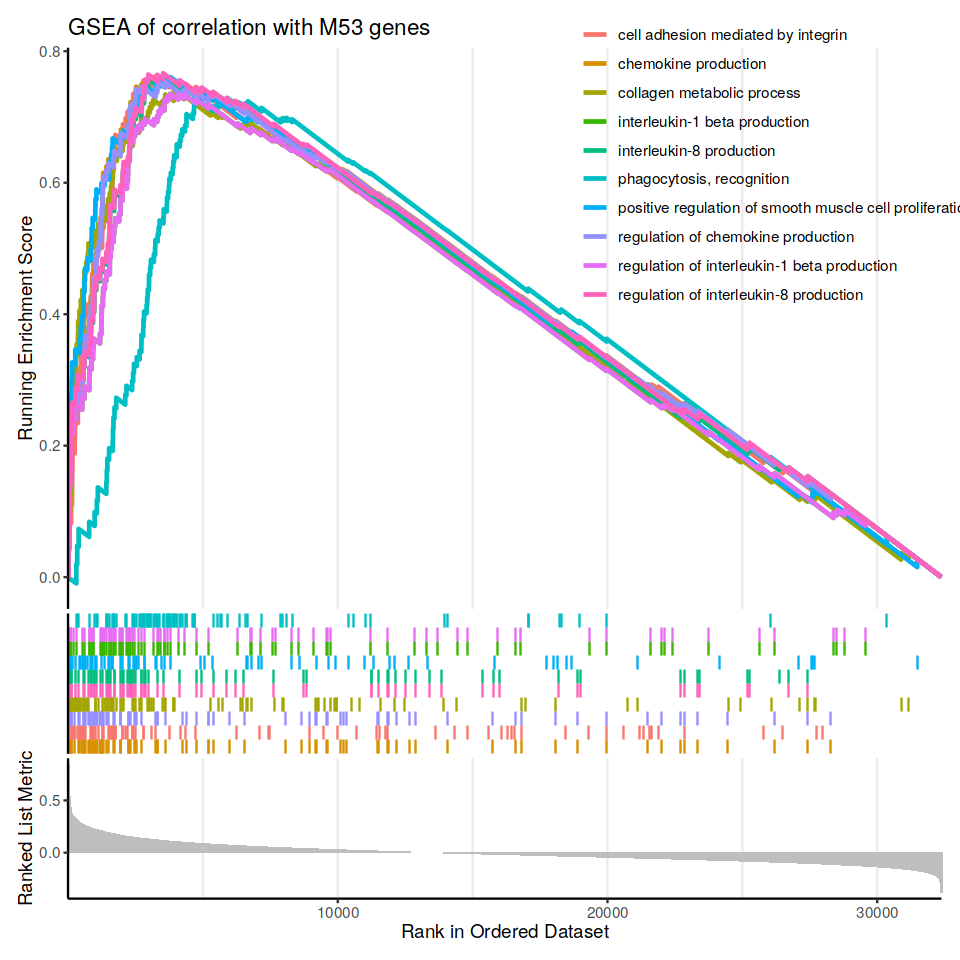

In [6]:
options(repr.plot.height = 8, repr.plot.width = 8)
gseap1 <- gseaplot2(gse,title = 'GSEA of correlation with M53 genes',rel_heights = c(2, 0.5, 0.5),
          1:10 #绘制前3个
         ) # 显示p值
gseap1 

In [7]:
pdf(file = './output/bulk/section_5/2.MEGENA_module_c1_53_corGenerankGseaplot.pdf',width = 8,height = 8)
print(gseap1)
dev.off()

png 
  2

## 2.Cell type enrichment analysis of ROS-related genes 

In [ ]:
mergeData_immune <- readRDS(file = './output/1.sangleCell_pre/OV_mergeData_immune_final.RDS')

#### 2.1 Extraction of epithelial cell for OV_GSE165897

In [17]:
OV_GSE165897 <- readRDS(file = './output/GSE165897.merge.object.rds')
OV_GSE165897_epi <- subset(OV_GSE165897,cellType_auto %in% c('Epi'))
OV_GSE165897_epi@meta.data <- OV_GSE165897_epi@meta.data[,c('orig.ident','nCount_RNA','nFeature_RNA','sample','patient_id','cellType_auto')]
OV_GSE165897_epi$cellType <- OV_GSE165897_epi$cellType_auto
OV_GSE165897_epi[['module_AUC']] <- NULL

In [18]:
head(OV_GSE165897_epi)

,orig.ident,nCount_RNA,nFeature_RNA,sample,patient_id,cellType_auto,cellType
,<fct>,<dbl>,<int>,<chr>,<chr>,<fct>,<fct>
AAACCTGCAGGTTTCA-EOC372_pPer,GSE165897,33534,5700,EOC372_primary_Peritoneum,EOC372,Epi,Epi
AAACCTGGTCCGAATT-EOC372_pPer,GSE165897,17828,3196,EOC372_primary_Peritoneum,EOC372,Epi,Epi
AAAGATGCATCTGGTA-EOC372_pPer,GSE165897,9999,2148,EOC372_primary_Peritoneum,EOC372,Epi,Epi
AAAGTAGTCGCTTAGA-EOC372_pPer,GSE165897,17819,3438,EOC372_primary_Peritoneum,EOC372,Epi,Epi
AAATGCCAGGTGCACA-EOC372_pPer,GSE165897,11506,2839,EOC372_primary_Peritoneum,EOC372,Epi,Epi
AAATGCCAGTACGATA-EOC372_pPer,GSE165897,5553,1773,EOC372_primary_Peritoneum,EOC372,Epi,Epi
AACCATGCACGTTGGC-EOC372_pPer,GSE165897,46567,6572,EOC372_primary_Peritoneum,EOC372,Epi,Epi
AACTCAGGTACATCCA-EOC372_pPer,GSE165897,18190,3919,EOC372_primary_Peritoneum,EOC372,Epi,Epi
AACTCCCGTAAACACA-EOC372_pPer,GSE165897,17146,3775,EOC372_primary_Peritoneum,EOC372,Epi,Epi


In [19]:
OV_GSE165897_epi$cellType <- ifelse(grepl(pattern = 'primary',OV_GSE165897_epi$sample),'Epi-pre','Epi-post')

In [20]:
sc_data <- merge(mergeData_immune,OV_GSE165897_epi)

In [21]:
library(Seurat)

In [22]:
sc_data$cellType_rough <- sc_data$cellType
sc_data$cellType_rough <- ifelse(sc_data$cellType %in% c('CD38+NK','CD8+TpreEx','CD8+Te','CD8+Tem','CD8+Tex','CD8+Tn','ISG+CD8T','Mature NK','NK','Tfh','Th17','Tn','Treg'),'T',sc_data$cellType_rough)
sc_data$cellType_rough <- ifelse(sc_data$cellType %in% c('Macro_C1QB','Macro_CCL3L3','Macro_CXCL10','Macro_MARCO','Macro_SPP1','Mono_FCN1','Macro_MT1H','mast_cell','pDC','cDC1','cDC2'),'myeloid',sc_data$cellType_rough)
sc_data$cellType_rough <- ifelse(sc_data$cellType %in% c('Plasma cell','B cell'),'B',sc_data$cellType_rough)
sc_data$cellType_rough <- ifelse(sc_data$cellType %in% c('CAF1','CAF2','CAF3','CAF4','CAF5','myCAF','Endo'),'stroma cell',sc_data$cellType_rough)
sc_data$cellType_rough <- ifelse(sc_data$cellType %in% c('Epi-pre','Epi-post'),'epithelial cell',sc_data$cellType_rough)


In [23]:
table(sc_data$cellType_rough)


              B epithelial cell         myeloid     stroma cell               T 
           4742            8681           24764           26405           55006 

### 2.2 Cell type specific analysis of genes

In [144]:
gene_fisher <- function(data=GSE183904_merge_224,Subcluster='Subcluster',assays='RNA',solt='counts',gene=node$name,cellTpye="Fibroblast",exp_cutoff=1){
            fibcell <- c(data@meta.data[,Subcluster] %in% cellTpye)
            n.cell <- ncol(data)
            dataExp <- GetAssayData(data,assay = assays,slot = solt)
            #gene <- intersect(gene,rownames(data))
            res.geneFisher <- lapply(gene,function(i){
                if(i=='CCN2'){
                    j='CTGF'
                }
                if(i=='CCN1'){
                    j='CYR61'
                }else{
                    j=i
                }
                if(j %in% rownames(data)){
                
                cell_expGene <- c(dataExp[j,]>exp_cutoff)
                a11 <- sum(fibcell * cell_expGene)
                a12 <- sum(cell_expGene)- a11
                a21 <- sum(fibcell)- a11
                a22 <- n.cell - a12 - a21 - a11
               fisher_matrix <- matrix(c(a11,
                              a12,
                              a21,
                              a22),
                              nrow=2)
                res <- fisher.test(fisher_matrix,alternative='greater')   
                
                res.data <- data.frame(gene=i,cellType=cellTpye,OR=0,P=0,P.adjust=0,number_of_cell_expGene=0,Proportion=0)
                res.data$OR[1] <- as.vector(res[[3]])
                res.data$P[1] <- as.vector(res[[1]])
                res.data$P.adjust[1] <- as.vector(res[[1]])
                res.data$number_of_cell_expGene[1] <- fisher_matrix[1]
                #fisher[i,'Proportion'] <- fisher_matrix[1]/(fisher_matrix[1]+fisher_matrix[2])  
                res.data$Proportion[1] <- fisher_matrix[1]/sum(fibcell)
                }else{
                   res.data <- data.frame(gene=i,cellType=cellTpye,OR=NA,P=NA,P.adjust=NA,number_of_cell_expGene=NA,Proportion=NA)     
                }
                return(res.data)
            })
    if(length(res.geneFisher)>1){
           res.geneFisher <- do.call(rbind,res.geneFisher)
           res.geneFisher$P.adjust <- p.adjust(res.geneFisher$P,n = length(res.geneFisher$P))
    }else{
       res.geneFisher <-  res.geneFisher[[1]]
    }

    return(res.geneFisher)
}


In [146]:
gene_fisher_list <- lapply(unique(sc_data$cellType_rough),FUN = function(celltype){
    print(celltype)
    return(gene_fisher(data = sc_data,Subcluster = 'cellType_rough',gene = names(M53CorGene)[1:100],cellTpye = celltype))
})

[1] "B"
[1] "myeloid"
[1] "T"
[1] "stroma cell"
[1] "epithelial cell"


In [147]:
geneEnrich <- do.call(rbind,gene_fisher_list)
head(geneEnrich)

,gene,cellType,OR,P,P.adjust,number_of_cell_expGene,Proportion
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,DUSP1,B,0.5156468,1,1,1757,0.37051877
2,FOSB,B,0.3413633,1,1,913,0.19253480
3,FOS,B,0.4328290,1,1,1427,0.30092788
4,ZFP36,B,0.4723314,1,1,1323,0.27899620
5,NR4A1,B,0.4346568,1,1,440,0.09278785
6,EGR1,B,0.2579737,1,1,363,0.07654998


In [148]:
geneEnrich_cast <- unstack(geneEnrich,OR~gene)
selectGene <- setdiff(colnames(geneEnrich_cast),names(which(colSums(geneEnrich_cast)==0 | is.infinite(colSums(geneEnrich_cast)))))
geneEnrich <- geneEnrich[which(geneEnrich$gene %in% selectGene),]

### 2.3 Cell type enrichment score calculation

In [149]:
test <- DotPlot(object = sc_data,features = selectGene,group.by = 'cellType')
Zscore_data <- test$data
Zscore_data$id <- as.character(Zscore_data$id)
Zscore_Top100 <- sapply(X = unique(x = Zscore_data$id), FUN = function(y) {
            data.use <- Zscore_data[Zscore_data$id == 
                y, "avg.exp.scaled"]
                data.use <- mean(x = data.use)
            return(data.use)
        })

In [151]:
cell_streeScore <- data.frame(cellType=names(Zscore_Top100),Escore=Zscore_Top100)
cell_streeScore$cellType <- as.factor(cell_streeScore$cellType)

In [153]:
cell_streeScore$cellType <- factor(x = cell_streeScore$cellType,
                               levels = c('CAF1','CAF2','CAF3','CAF4','CAF5','myCAF','Endo','Epi-pre','Epi-post',
                                          'Macro_C1QB','Macro_CCL3L3','Macro_CXCL10','Macro_MARCO','Macro_MT1H','Macro_SPP1','Mono_FCN1','mast_cell','cDC1','cDC2','pDC',
                                        'CD38+NK','NK','Mature NK','Tfh','Th17','Treg','Tn','CD8+Te','CD8+Tem','CD8+Tex','CD8+Tn','CD8+TpreEx','ISG+CD8T','B cell','Plasma cell'),
                                labels = c('CAF1','CAF2','CAF3','CAF4','CAF5','myCAF','Endo','Epi-pre','Epi-post',
                                          'Macro_C1QB','Macro_CCL3L3','Macro_CXCL10','Macro_MARCO','Macro_MT1H','Macro_SPP1','Mono_FCN1','mast_cell','cDC1','cDC2','pDC',
                                        'CD38+NK','NK','Mature NK','Tfh','Th17','Treg','Tn','CD8+Te','CD8+Tem','CD8+Tex','CD8+Tn','CD8+TpreEx','ISG+CD8T','B cell','Plasma cell') 
                              )

In [154]:
library(ggpubr)

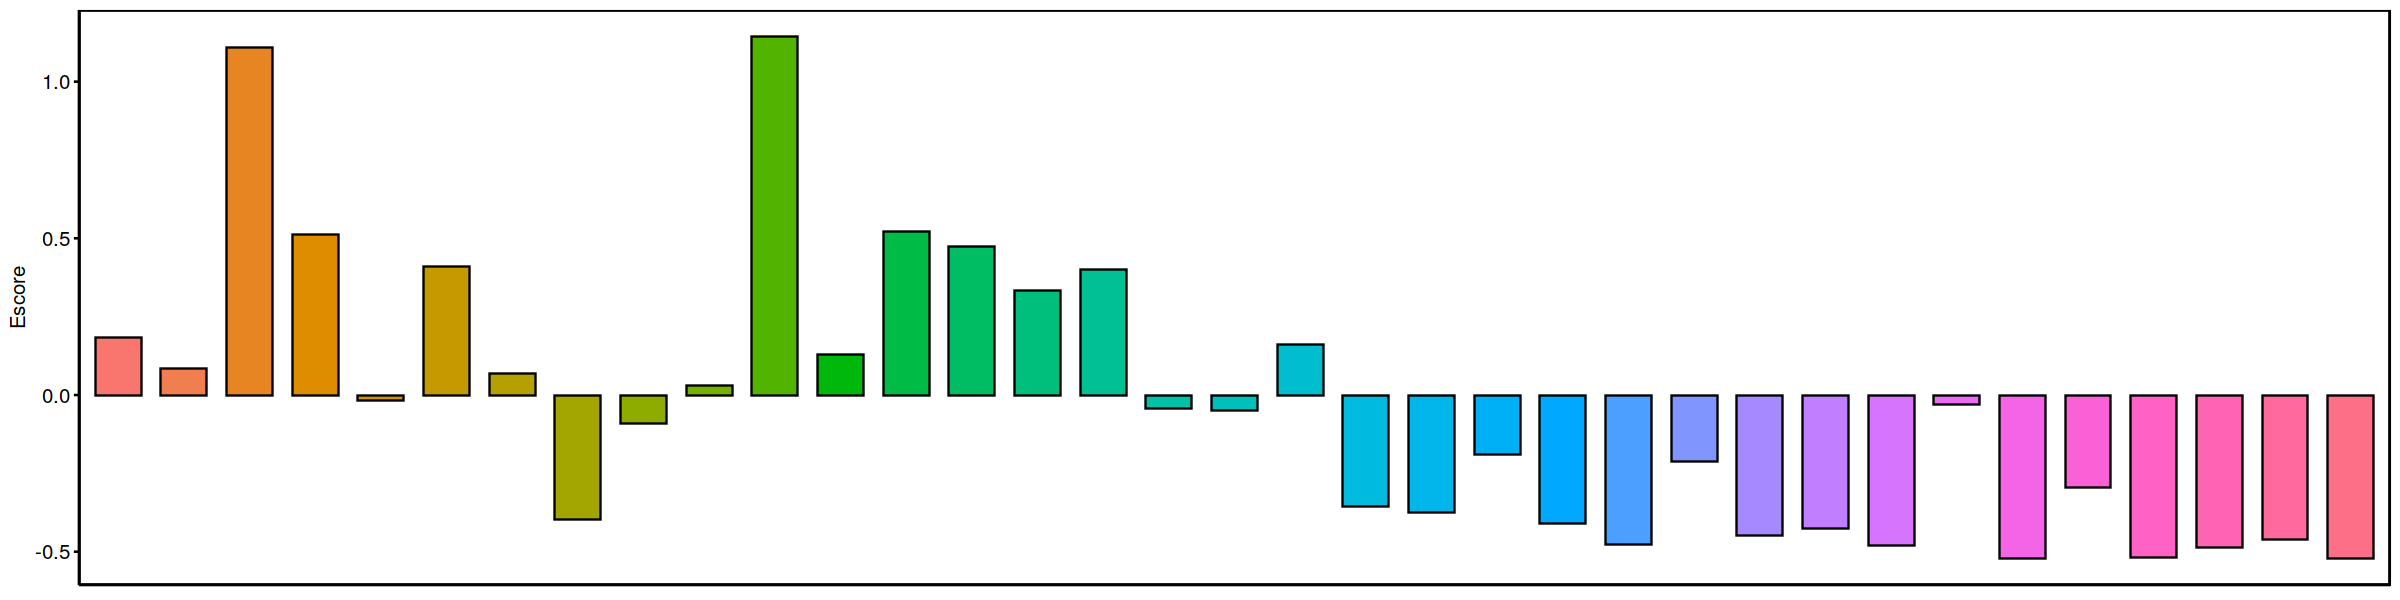

In [155]:
options(repr.plot.height = 5, repr.plot.width = 20)
p1 <- ggbarplot(data = cell_streeScore,x = 'cellType',y = 'Escore',fill = 'cellType',legend='None')+xlab(NULL)+
theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"),legend.position="none",axis.ticks.x = element_blank(),axis.text.x = element_blank())
p1

In [ ]:
test5 <- DotPlot(object = sc_data,assay = 'RNA',
        features = selectGene,cols = c('blue','red'),group.by = 'cellType')

In [158]:
CAFmarker_data  <- test5$data
CAFmarker_data$Zscore <- CAFmarker_data$avg.exp.scaled
CAFmarker_data$cluster <-  CAFmarker_data$id
CAFmarker_data$cluster <- factor(x = CAFmarker_data$cluster,
                               levels = c('CAF1','CAF2','CAF3','CAF4','CAF5','myCAF','Endo','Epi-pre','Epi-post',
                                          'Macro_C1QB','Macro_CCL3L3','Macro_CXCL10','Macro_MARCO','Macro_MT1H','Macro_SPP1','Mono_FCN1','mast_cell','cDC1','cDC2',
                                        'CD38+NK','NK','Mature NK','Tfh','Th17','Treg','Tn','CD8+Te','CD8+Tem','CD8+Tex','CD8+Tn','CD8+TpreEx','ISG+CD8T','B cell','Plasma cell','pDC'),
                                labels = c('CAF1','CAF2','CAF3','CAF4','CAF5','myCAF','Endo','Epi-pre','Epi-post',
                                          'Macro_C1QB','Macro_CCL3L3','Macro_CXCL10','Macro_MARCO','Macro_MT1H','Macro_SPP1','Mono_FCN1','mast_cell','cDC1','cDC2',
                                        'CD38+NK','NK','Mature NK','Tfh','Th17','Treg','Tn','CD8+Te','CD8+Tem','CD8+Tex','CD8+Tn','CD8+TpreEx','ISG+CD8T','B cell','Plasma cell','pDC') 
                              )

In [159]:
library(aplot)

In [160]:
library(reshape2) 
library(reshape) 

In [161]:
cast_data <- unstack(CAFmarker_data,Zscore~features.plot)

In [162]:
rownames(cast_data) <- unique(CAFmarker_data$cluster)

In [163]:
cast_data[,'TCIM']

[1] -0.31540140 -0.31540140 -0.29965376 -0.06298379 -0.14822997 -0.22709386
 [7] -0.07539813 -0.28091454 -0.15633962 -0.24771214 -0.25296949 -0.24061766
[13] -0.29565583 -0.28438331 -0.29823757 -0.26691845  2.50000000 -0.23553715
[19] -0.26347278 -0.26120884 -0.28770807 -0.28949032 -0.29769421 -0.24136874
[25] -0.14944417 -0.27123487 -0.26118062  2.50000000 -0.26325928 -0.27515184
[31] -0.11784928 -0.20916063 -0.24882792 -0.23279098 -0.25551961

In [164]:
library(pheatmap)

### 2.4 Clustering of genes based on cell type specificity

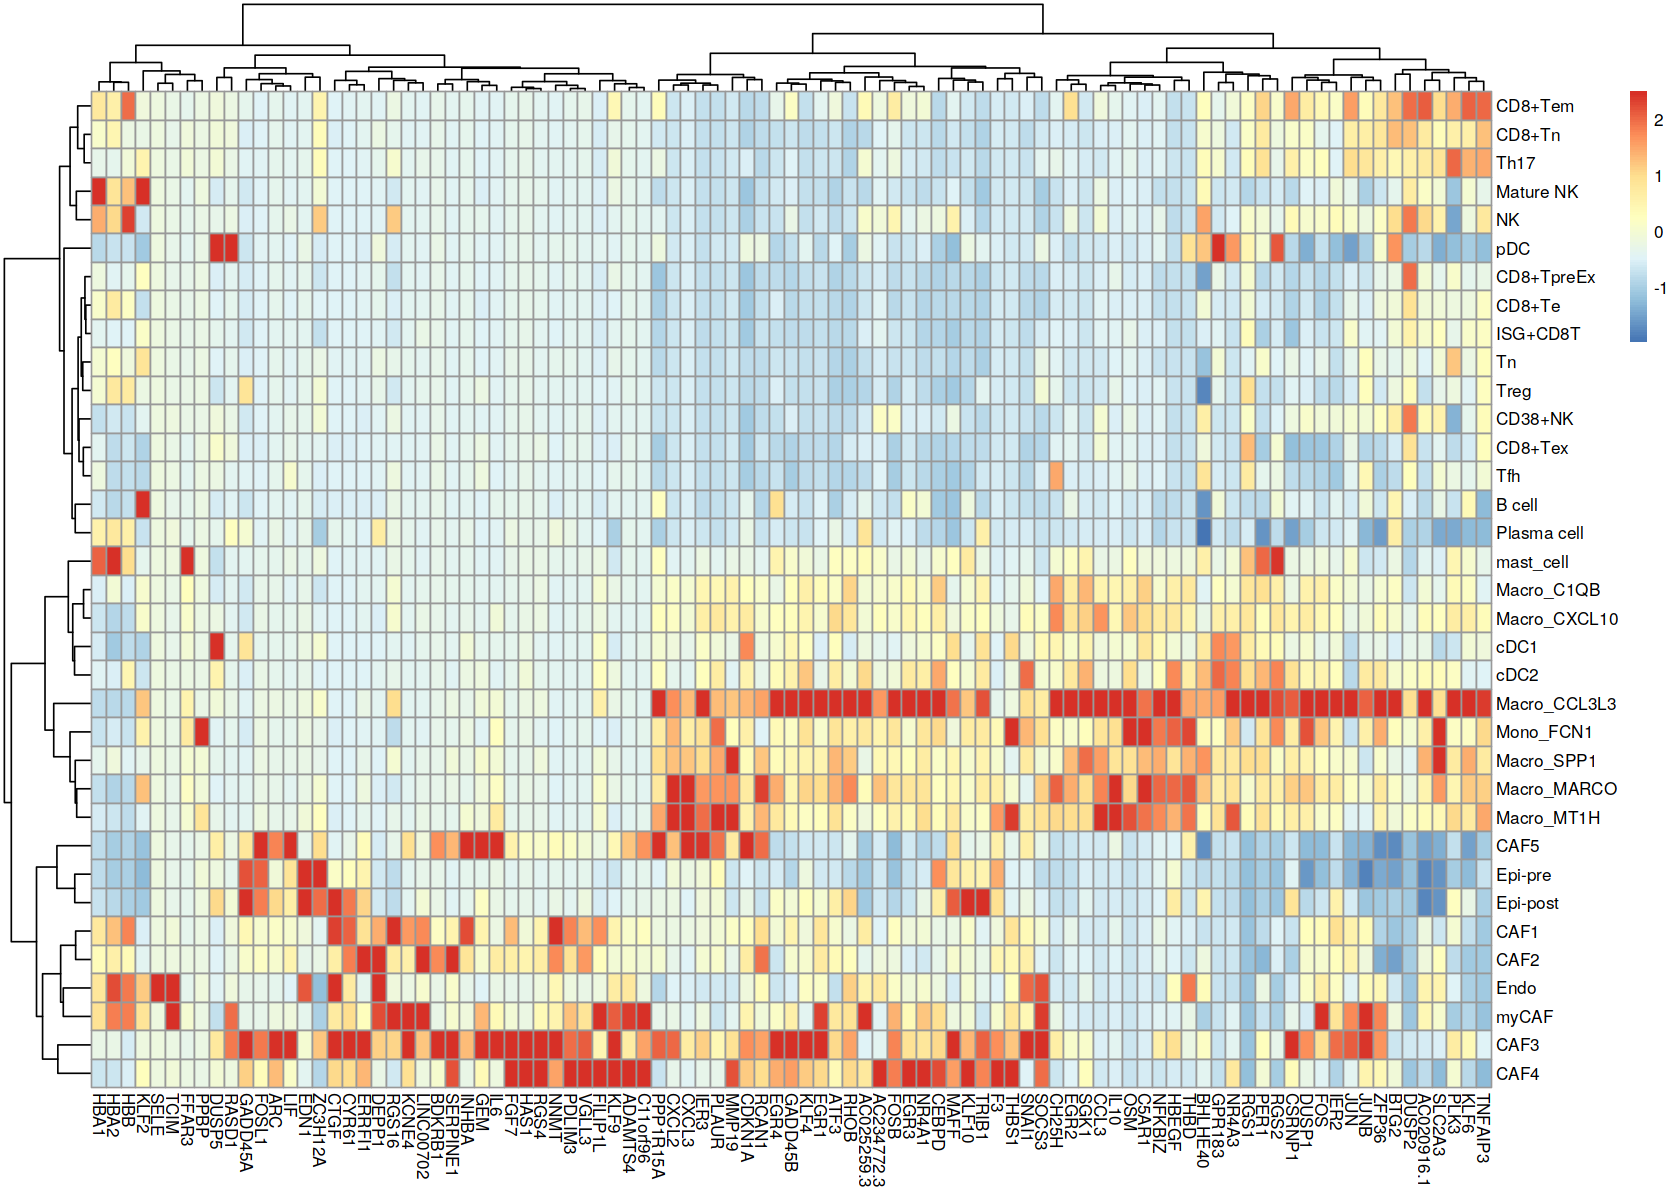

In [166]:
options(repr.plot.height = 10, repr.plot.width = 14)
test <- pheatmap(as.matrix(cast_data),clustering_method = 'ward.D2')

In [167]:
test$tree_col$labels[test$tree_col$order]

[1] "HBA1"       "HBA2"       "HBB"        "KLF2"       "SELE"      
 [6] "TCIM"       "FFAR3"      "PPBP"       "DUSP5"      "RASD1"     
[11] "GADD45A"    "FOSL1"      "ARC"        "LIF"        "EDN1"      
[16] "ZC3H12A"    "CTGF"       "CYR61"      "ERRFI1"     "DEPP1"     
[21] "RGS16"      "KCNE4"      "LINC00702"  "BDKRB1"     "SERPINE1"  
[26] "INHBA"      "GEM"        "IL6"        "FGF7"       "HAS1"      
[31] "RGS4"       "NNMT"       "PDLIM3"     "VGLL3"      "FILIP1L"   
[36] "KLF9"       "ADAMTS4"    "C11orf96"   "PPP1R15A"   "CXCL2"     
[41] "CXCL3"      "IER3"       "PLAUR"      "MMP19"      "CDKN1A"    
[46] "RCAN1"      "EGR4"       "GADD45B"    "KLF4"       "EGR1"      
[51] "ATF3"       "RHOB"       "AC025259.3" "AC234772.3" "FOSB"      
[56] "EGR3"       "NR4A1"      "CEBPD"      "MAFF"       "KLF10"     
[61] "TRIB1"      "F3"         "THBS1"      "SNAI1"      "SOCS3"     
[66] "CH25H"      "EGR2"       "SGK1"       "CCL3"       "IL10"      
[71] "OSM"        "C5AR1"      "NFKBIZ"     "HBEGF"      "THBD"      
[76] "BHLHE40"    "GPR183"     "NR4A3"      "RGS1"       "PER1"      
[81] "RGS2"       "CSRNP1"     "DUSP1"      "FOS"        "IER2"      
[86] "JUN"        "JUNB"       "ZFP36"      "BTG2"       "DUSP2"     
[91] "AC020916.1" "SLC2A3"     "PLK3"       "KLF6"       "TNFAIP3"

In [175]:
test$tree_col$labels[test$tree_col$order]

[1] "HBA1"       "HBA2"       "HBB"        "KLF2"       "SELE"      
 [6] "TCIM"       "FFAR3"      "PPBP"       "DUSP5"      "RASD1"     
[11] "GADD45A"    "FOSL1"      "ARC"        "LIF"        "EDN1"      
[16] "ZC3H12A"    "CTGF"       "CYR61"      "ERRFI1"     "DEPP1"     
[21] "RGS16"      "KCNE4"      "LINC00702"  "BDKRB1"     "SERPINE1"  
[26] "INHBA"      "GEM"        "IL6"        "FGF7"       "HAS1"      
[31] "RGS4"       "NNMT"       "PDLIM3"     "VGLL3"      "FILIP1L"   
[36] "KLF9"       "ADAMTS4"    "C11orf96"   "PPP1R15A"   "CXCL2"     
[41] "CXCL3"      "IER3"       "PLAUR"      "MMP19"      "CDKN1A"    
[46] "RCAN1"      "EGR4"       "GADD45B"    "KLF4"       "EGR1"      
[51] "ATF3"       "RHOB"       "AC025259.3" "AC234772.3" "FOSB"      
[56] "EGR3"       "NR4A1"      "CEBPD"      "MAFF"       "KLF10"     
[61] "TRIB1"      "F3"         "THBS1"      "SNAI1"      "SOCS3"     
[66] "CH25H"      "EGR2"       "SGK1"       "CCL3"       "IL10"      
[71] "OSM"        "C5AR1"      "NFKBIZ"     "HBEGF"      "THBD"      
[76] "BHLHE40"    "GPR183"     "NR4A3"      "RGS1"       "PER1"      
[81] "RGS2"       "CSRNP1"     "DUSP1"      "FOS"        "IER2"      
[86] "JUN"        "JUNB"       "ZFP36"      "BTG2"       "DUSP2"     
[91] "AC020916.1" "SLC2A3"     "PLK3"       "KLF6"       "TNFAIP3"

In [176]:
geneEnrich$gene <- factor(x = geneEnrich$gene,
                               levels = test$tree_col$labels[test$tree_col$order],
                                labels = test$tree_col$labels[test$tree_col$order] 
                              )

In [177]:
library(RColorBrewer)
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
#处理后有73种差异还比较明显的颜色，基本够用
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
set.seed(seed = 1234)
cellType_col <- sample(col_vector, 5)

In [183]:
gene_color <- ifelse(test$tree_col$labels[test$tree_col$order] %in% modules_list$c1_53, 'red','black')

### 2.5 Visualization

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


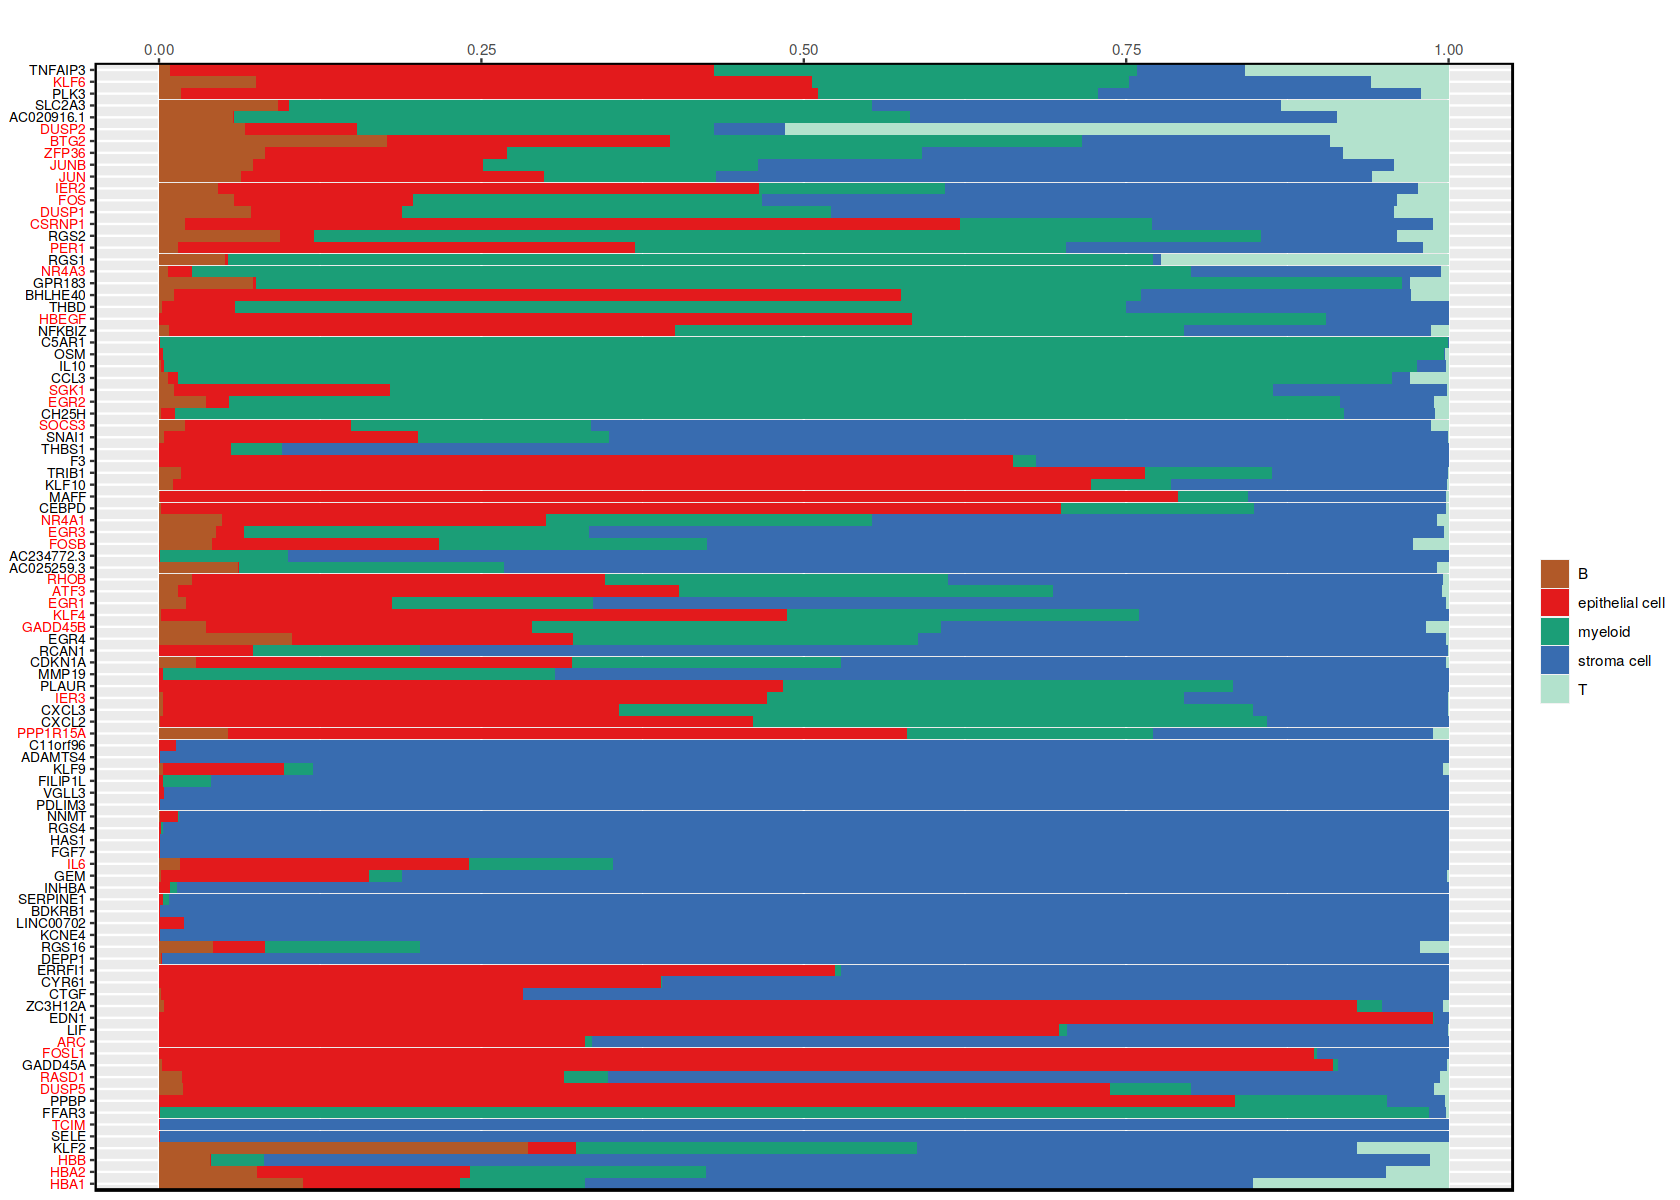

In [185]:
geneEnrichP <- ggplot(geneEnrich,aes(gene,OR,fill=cellType))+ 
scale_fill_manual("cellType", values =  cellType_col) + xlab(NULL) + ylab(NULL)+
geom_bar(stat="identity",position=position_fill(reverse=T))+scale_y_continuous(position = "right")+
ggtitle("")+ theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"),axis.text.y=element_text(size=8,color = gene_color))+
guides(fill=guide_legend(title=NULL)) + coord_flip()
geneEnrichP

In [186]:
CAFmarker_data$features.plot <- factor(x = CAFmarker_data$features.plot,
                               levels = test$tree_col$labels[test$tree_col$order],
                                labels = test$tree_col$labels[test$tree_col$order] 
                              )

In [187]:
group <- c('CAF1','CAF2','CAF3','CAF4','CAF5','myCAF','Endo','Epi-pre','Epi-post',
                                          'Macro_C1QB','Macro_CCL3L3','Macro_CXCL10','Macro_MARCO','Macro_MT1H','Macro_SPP1','Mono_FCN1','mast_cell','cDC1','cDC2',
                                        'CD38+NK','NK','Mature NK','Tfh','Th17','Treg','Tn','CD8+Te','CD8+Tem','CD8+Tex','CD8+Tn','CD8+TpreEx','ISG+CD8T','B cell','Plasma cell','pDC') %>% as.data.frame() %>% 
  mutate(group=c(rep("stroma cell",7),rep('epithelial cell',2),rep("myeloid cell",10),rep("T cell",13),rep("B cell",3))) %>%
  mutate(p="Cell group") %>%
  ggplot(aes(.,y=p,fill=group))+scale_fill_manual("group", values =  cellType_col)+
  geom_tile() + 
  scale_y_discrete(position="right") +
  theme_minimal()+xlab(NULL) + ylab(NULL) +
  theme(axis.text.x = element_blank())+
  labs(fill = "Cell group")

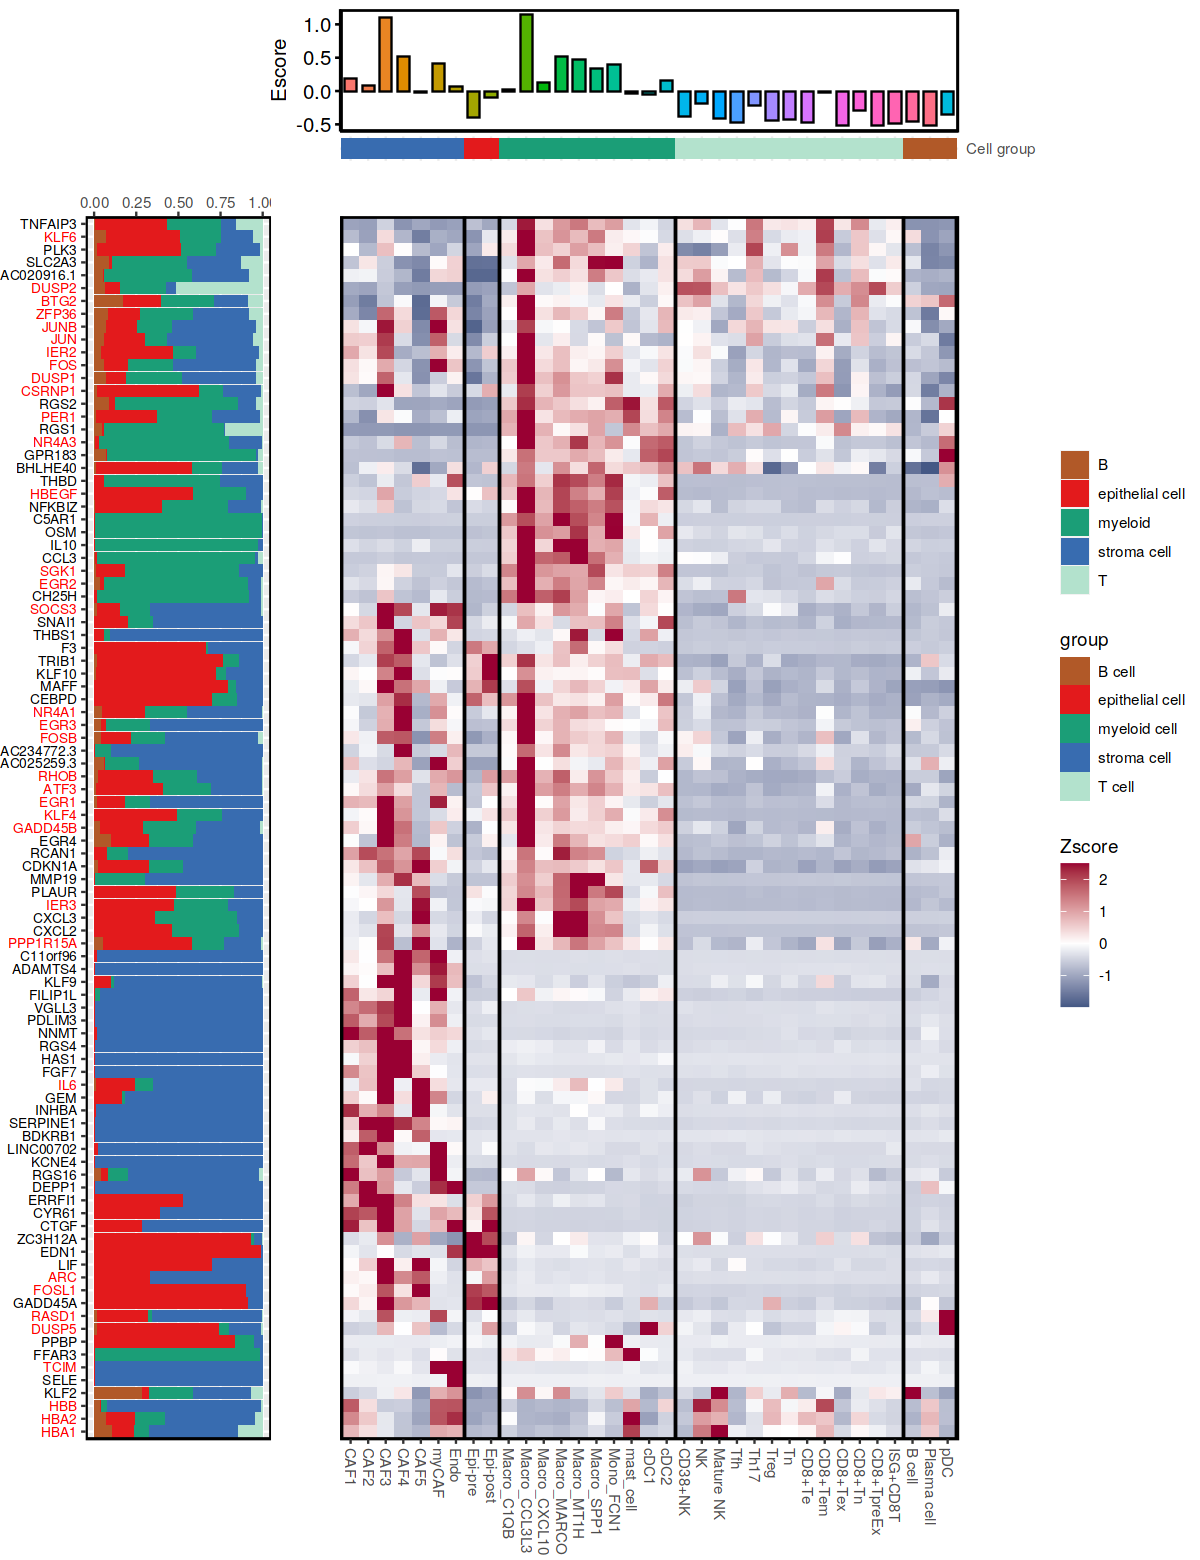

In [191]:
options(repr.plot.height = 13, repr.plot.width = 10)
p2 <- ggplot(CAFmarker_data, aes(y=features.plot, x=cluster, fill=Zscore))+ 
geom_raster()+scale_fill_gradient2(low="#003366", high="#990033", mid="white")+
theme(axis.text.x = element_text(angle = -90,hjust = 0,vjust = 0.5),axis.ticks.y = element_blank(),axis.text.y = element_blank())+
xlab(NULL) + ylab(NULL)+
  theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"))+
  geom_vline(xintercept=c(0.5,7.5,9.5,19.5,32.5,35.5),size=.8)
p3 <- p2 %>% insert_left(geneEnrichP,width = .3) %>%
insert_top(group, height = .02) %>% 
insert_top(p1, height = .1)
p3

In [192]:
pdf(file = './output/bulk/section_5/2.M53_corGenerankCellTypeEnrichment.pdf',width = 10,height = 13)
print(p3)
dev.off()
                   

png 
  2

### 2.6 pathway enrichment analysis of ROS-related gene clusters

In [220]:
ROS_genes <- list(epithelium=c('PPBP','DUSP5','RASD1','GADD45A','FOSL1','ARC','LIF','EDN1','ZC3H12A','CTGF','CYR61','ERRFI1'),
                  stroma=c('DEPP1','RGS16','KCNE4','LINC00702','BDKRB1','SERPINE1','INHBA','GEM','IL6','FGF7','HAS1','RGS4','NNMT','PDLIM3','VGLL3','FILIP1L','KLF9','ADAMTS4','C11orf96'),
                  Common2=c('PPP1R15A','CXCL2','CXCL3','IER3','PLAUR','MMP19','CDKN1A','RCAN1','EGR4','GADD45B','KLF4','EGR1','ATF3','RHOB','AC025259.3','AC234772.3','FOSB','EGR3','NR4A1','CEBPD','MAFF','KLF10','TRIB1','F3','THBS1','SNAI1','SOCS3'),
                  Myeloid=c('CH25H','EGR2','SGK1','CCL3','IL10','OSM','C5AR1'),
                  Common1=c('NFKBIZ','HBEGF','THBD','BHLHE40','GPR183','NR4A3','RGS1','PER1','RGS2','CSRNP1','DUSP1','FOS','IER2','JUN','JUNB','ZFP36','BTG2','DUSP2','AC020916.1','SLC2A3','PLK3','KLF6','TNFAIP3')
                 )


In [221]:
library(clusterProfiler)
library(org.Hs.eg.db)

In [222]:
ROS_genesID <- lapply(ROS_genes,function(x){
    print(x)
    geneID.table=unique(mapIds(org.Hs.eg.db,keys=x,column='ENTREZID', keytype='SYMBOL',multiVals="first"))
})

 [1] "PPBP"    "DUSP5"   "RASD1"   "GADD45A" "FOSL1"   "ARC"     "LIF"    
 [8] "EDN1"    "ZC3H12A" "CTGF"    "CYR61"   "ERRFI1" 


'select()' returned 1:1 mapping between keys and columns



 [1] "DEPP1"     "RGS16"     "KCNE4"     "LINC00702" "BDKRB1"    "SERPINE1" 
 [7] "INHBA"     "GEM"       "IL6"       "FGF7"      "HAS1"      "RGS4"     
[13] "NNMT"      "PDLIM3"    "VGLL3"     "FILIP1L"   "KLF9"      "ADAMTS4"  
[19] "C11orf96" 


'select()' returned 1:1 mapping between keys and columns



 [1] "PPP1R15A"   "CXCL2"      "CXCL3"      "IER3"       "PLAUR"     
 [6] "MMP19"      "CDKN1A"     "RCAN1"      "EGR4"       "GADD45B"   
[11] "KLF4"       "EGR1"       "ATF3"       "RHOB"       "AC025259.3"
[16] "AC234772.3" "FOSB"       "EGR3"       "NR4A1"      "CEBPD"     
[21] "MAFF"       "KLF10"      "TRIB1"      "F3"         "THBS1"     
[26] "SNAI1"      "SOCS3"     


'select()' returned 1:1 mapping between keys and columns



[1] "CH25H" "EGR2"  "SGK1"  "CCL3"  "IL10"  "OSM"   "C5AR1"


'select()' returned 1:1 mapping between keys and columns



 [1] "NFKBIZ"     "HBEGF"      "THBD"       "BHLHE40"    "GPR183"    
 [6] "NR4A3"      "RGS1"       "PER1"       "RGS2"       "CSRNP1"    
[11] "DUSP1"      "FOS"        "IER2"       "JUN"        "JUNB"      
[16] "ZFP36"      "BTG2"       "DUSP2"      "AC020916.1" "SLC2A3"    
[21] "PLK3"       "KLF6"       "TNFAIP3"   


'select()' returned 1:1 mapping between keys and columns



In [223]:
ROS_genesID

$epithelium
 [1] "5473"  "1847"  "51655" "1647"  "8061"  "23237" "3976"  "1906"  "80149"
[10] NA      "54206"

$stroma
 [1] "11067"     "6004"      "23704"     "100652988" "623"       "5054"     
 [7] "3624"      "2669"      "3569"      "2252"      "3036"      "5999"     
[13] "4837"      "27295"     "389136"    "11259"     "687"       "9507"     
[19] "387763"   

$Common2
 [1] "23645" "2920"  "2921"  "8870"  "5329"  "4327"  "1026"  "1827"  "1961" 
[10] "4616"  "9314"  "1958"  "467"   "388"   NA      "2354"  "1960"  "3164" 
[19] "1052"  "23764" "7071"  "10221" "2152"  "7057"  "6615"  "9021" 

$Myeloid
[1] "9023" "1959" "6446" "6348" "3586" "5008" "728" 

$Common1
 [1] "64332" "1839"  "7056"  "8553"  "1880"  "8013"  "5996"  "5187"  "5997" 
[10] "64651" "1843"  "2353"  "9592"  "3725"  "3726"  "7538"  "7832"  "1844" 
[19] NA      "6515"  "1263"  "1316"  "7128"

In [203]:
library(ReactomePA)

ReactomePA v1.42.0  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use ReactomePA in published research, please cite:
Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor package for reactome pathway analysis and visualization. Molecular BioSystems 2016, 12(2):477-479



In [224]:
ROS_geneSetPathway <- compareCluster(ROS_genesID,fun = 'enrichPathway',organism = "human",minGSSize = 10)

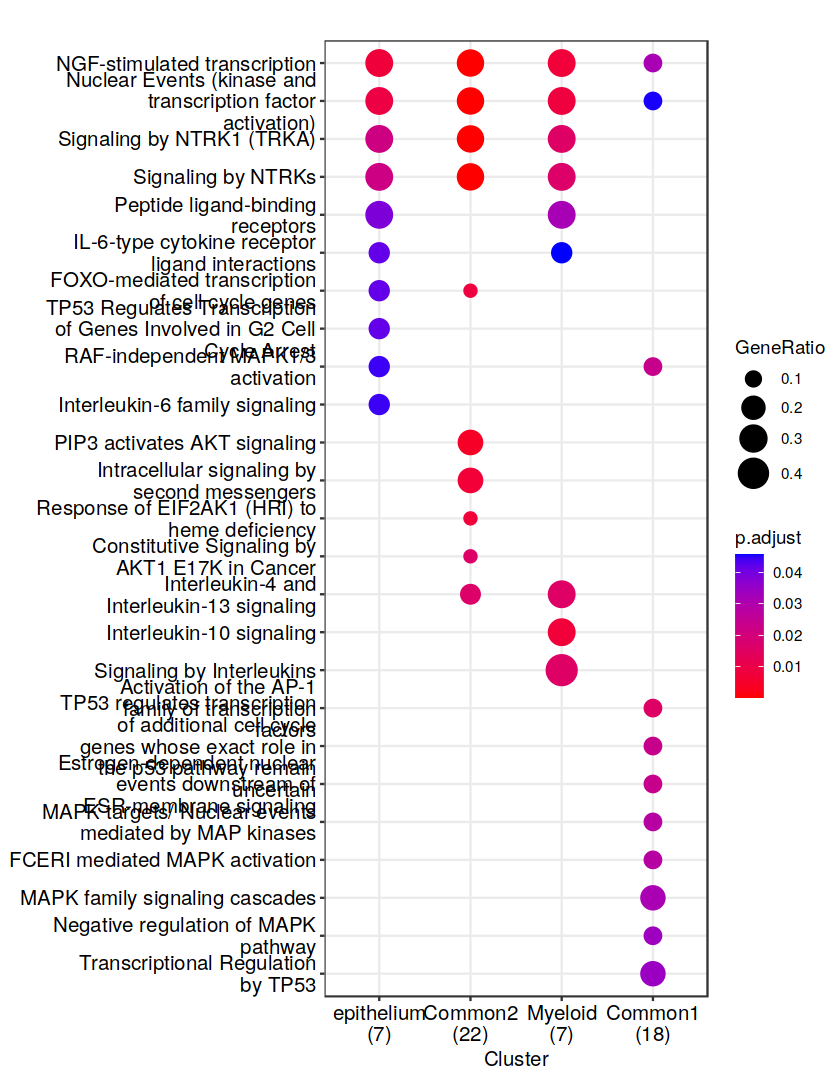

In [225]:
options(repr.plot.height = 9, repr.plot.width = 7)
dotplot(ROS_geneSetPathway,showCategory = 10)

In [226]:
ROS_geneSetGOE <- compareCluster(ROS_genesID,fun = 'enrichGO',OrgDb= org.Hs.eg.db,ont = "BP",pvalueCutoff=0.01)

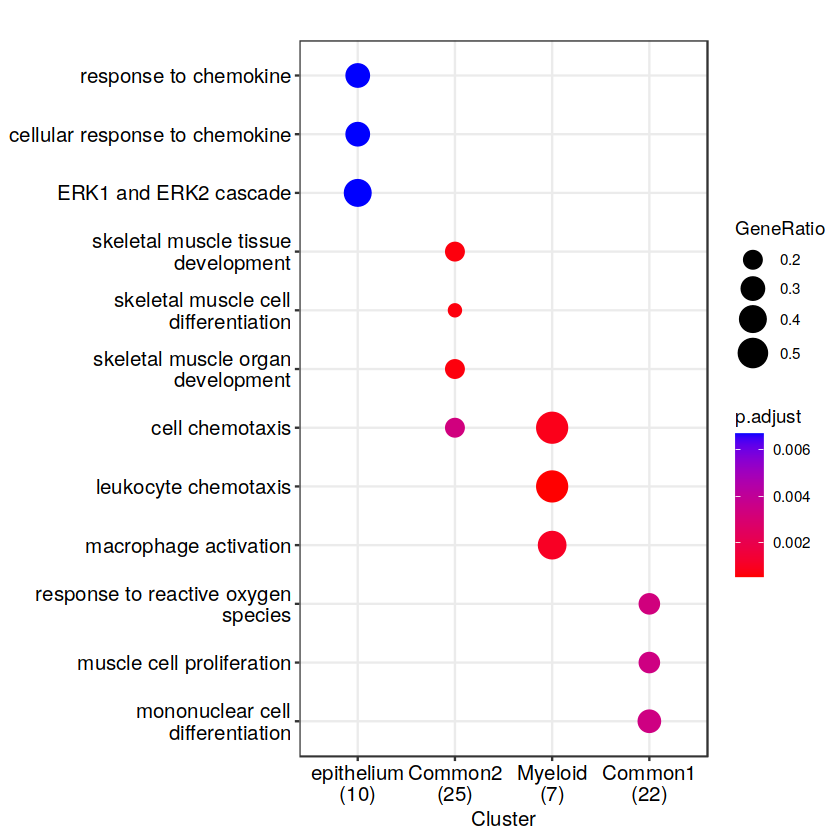

In [228]:
options(repr.plot.height = 7, repr.plot.width = 7)
dotplot(ROS_geneSetGOE,showCategory = 3)

In [213]:
ROS_geneSetGOE@compareClusterResult

Cluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
Common1,GO:0007519,skeletal muscle tissue development,5/25,164/18903,2.134944e-06,0.0006741789,0.0003807596,1827/1958/467/3164/23764,5
Common1,GO:0035914,skeletal muscle cell differentiation,4/25,72/18903,2.303423e-06,0.0006741789,0.0003807596,1958/467/3164/23764,4
Common1,GO:0060538,skeletal muscle organ development,5/25,176/18903,3.019643e-06,0.0006741789,0.0003807596,1827/1958/467/3164/23764,5
Common1,GO:0043154,negative regulation of cysteine-type endopeptidase activity involved in apoptotic process,4/25,78/18903,3.176709e-06,0.0006741789,0.0003807596,5329/9314/3164/7057,4
Common1,GO:0007517,muscle organ development,6/25,348/18903,4.913204e-06,0.0006741789,0.0003807596,1827/1958/467/1960/3164/23764,6
Common1,GO:2000117,negative regulation of cysteine-type endopeptidase activity,4/25,91/18903,5.883696e-06,0.0006741789,0.0003807596,5329/9314/3164/7057,4
Common1,GO:0043281,regulation of cysteine-type endopeptidase activity involved in apoptotic process,5/25,205/18903,6.361449e-06,0.0006741789,0.0003807596,5329/9314/3164/2152/7057,5
Common1,GO:0010631,epithelial cell migration,6/25,366/18903,6.559949e-06,0.0006741789,0.0003807596,9314/388/1960/3164/7057/6615,6
Common1,GO:0002042,cell migration involved in sprouting angiogenesis,4/25,94/18903,6.695365e-06,0.0006741789,0.0003807596,9314/1960/3164/7057,4


## 3. Scatter diagram of ROS-related genes 

In [5]:
geneNeg2CytoTRACE_CAF <- c('FOSB','GADD45B','EGR1','KLF4','FOS','ZFP36','MGP','CTGF','NR4A1','ZFP36L2','CYR61','JUN','ID3','APOD','HSPB1','CEBPD','CRISPLD2','SPARCL1','BTG2','C7')
geneNeg2CytoTRACE_TAM <- c('CCL3L1','CCL3','CCL4','CCL4L2','PTGS2','IL6','IL1B','SERPINB2','F3','EGR1','TNF','PMAIP1','IFIT3','CCL20','GADD45A','CXCL2','LUCAT1','IFIT2','CXCL3','DUSP6')


In [9]:
geneCorM53_table <- data.frame(gene=names(M53CorGene),PPC=M53CorGene)


In [10]:
geneCorM53_table$cor2CytoTRACE_CAF <- ifelse(geneCorM53_table$gene %in% geneNeg2CytoTRACE_CAF,1,0)
geneCorM53_table$cor2CytoTRACE_TAM <- ifelse(geneCorM53_table$gene %in% geneNeg2CytoTRACE_TAM,1,0)

In [13]:
#geneCorM53_table$gene[which(geneCorM53_table$gene=='CCL3L1')] <- 'CCL3L3'

In [14]:
geneCorM53_table$class <- geneCorM53_table$cor2CytoTRACE_CAF+geneCorM53_table$cor2CytoTRACE_TAM
geneCorM53_table$lable <- ifelse(geneCorM53_table$class!=0,geneCorM53_table$gene,NA)
geneCorM53_table$isM53 <- ifelse(geneCorM53_table$gene %in% modules_list$c1_53, 'M53 genes','not M53 genes')

In [15]:
geneCorM53_table$rank <- 1:nrow(geneCorM53_table)
head(geneCorM53_table)

,gene,PPC,cor2CytoTRACE_CAF,cor2CytoTRACE_TAM,class,lable,isM53,rank
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
DUSP1,DUSP1,0.8411178,0,0,0,NA,M53 genes,1
FOSB,FOSB,0.8318683,1,0,1,FOSB,M53 genes,2
FOS,FOS,0.8113936,1,0,1,FOS,M53 genes,3
ZFP36,ZFP36,0.7896946,1,0,1,ZFP36,M53 genes,4
NR4A1,NR4A1,0.7561364,1,0,1,NR4A1,M53 genes,5
EGR1,EGR1,0.7550034,1,1,2,EGR1,M53 genes,6


In [35]:
geneCorM53_table['TNF',]

,gene,PPC,cor2CytoTRACE_CAF,cor2CytoTRACE_TAM,class,lable,isM53,rank
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
TNF,TNF,0.2593966,0,1,1,TNF,not M53 genes,612


In [36]:
?ggscatter

In [41]:
library(ggpubr)
library(ggrepel)

Warning message:
“Removed 5148 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 32341 rows containing missing values (`geom_text_repel()`).”


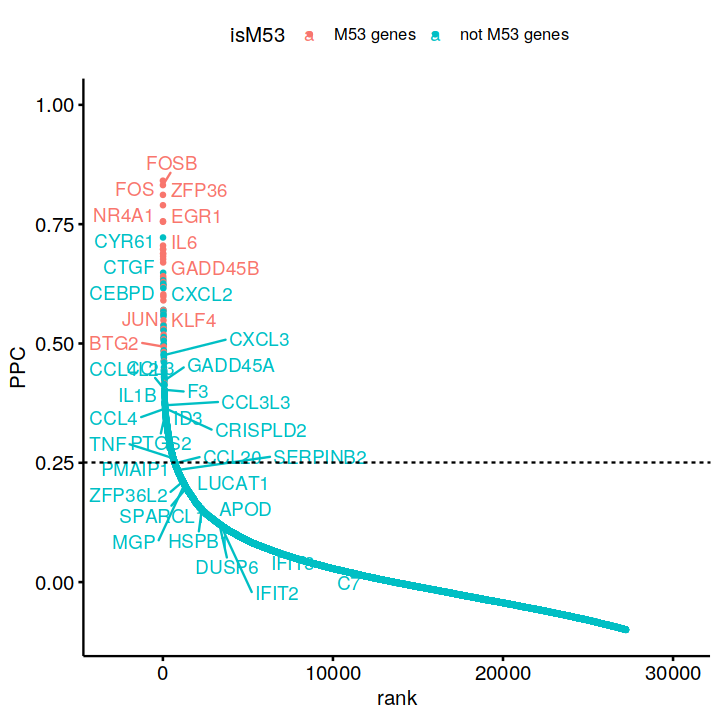

In [48]:
options(repr.plot.height = 6, repr.plot.width = 6)
ggscatter(data = geneCorM53_table,x = 'rank',y = 'PPC',color = 'isM53',size = 0.8)+geom_text_repel(aes(label = lable,color=isM53),max.overlaps=50)+
geom_hline(yintercept = 0.25,linetype='dashed')+xlim(-3000, 30500)+ylim(-0.1, 1)


In [ ]:
pdf(file = './output/bulk/section_5/0.M53GenesCor2CytoTRACE_CAFTAM_corGenerankPlot.pdf',width = 6,height = 6)
ggscatter(data = geneCorM53_table,x = 'rank',y = 'PPC',color = 'isM53',size = 0.8)+geom_text_repel(aes(label = lable,color=isM53),max.overlaps=50)+
geom_hline(yintercept = 0.25,linetype='dashed')+xlim(-3000, 30500)+ylim(-0.1, 1)
dev.off()

Warning message:
“Removed 5148 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 32341 rows containing missing values (`geom_text_repel()`).”
